# Parsing datetime data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/landslides.csv")
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


## Check and handle missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [4]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [5]:
df = df[~df['date'].isnull()]

In [6]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [7]:
df['time'].value_counts()

Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: time, Length: 159, dtype: int64

In [8]:
df['time'].isna().sum()

1064

In [9]:
df['time'] = df['time'].fillna("Not Known")
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [10]:
df['time'].isna().sum()

0

In [11]:
mean = df['fatalities'].mean()
mean

1.4622314622314623

In [12]:
df['fatalities'] = df['fatalities'].fillna(mean)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [13]:
df['fatalities'].isna().sum()

0

## Date time parsing using .to_datetime()

In [49]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%y")

In [62]:
df.month = df['date'].dt.month
df.month

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: month, Length: 1690, dtype: int64

In [63]:
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities,month
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.462231,3
1,42,2007-03-22,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231,3
2,56,2007-04-06,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231,4
3,59,2007-04-14,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231,4
4,61,2007-04-15,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000,4


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline



In [65]:
def splitString(string):
    return ''.join([x if x.islower() else f" {x}" for x in string])

def myHistPlot(df, xVar, interval, limit=1, figsize=[14,6]):
    
    # setting intervals for bins
    bins = np.arange(df[xVar].min(), df[xVar].quantile(limit)+interval, interval)
    #plot
    df[xVar].hist(bins = bins, grid = False, edgecolor = 'black', figsize = figsize);
    #labeling
    xVar = splitString(xVar)
    #title
    plt.title(f'Distribution of {xVar}{" - Data Excluded: "} {(1-limit):.0%}'.title(), fontsize = 14, weight = 'bold')
    #x label
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    #y label
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

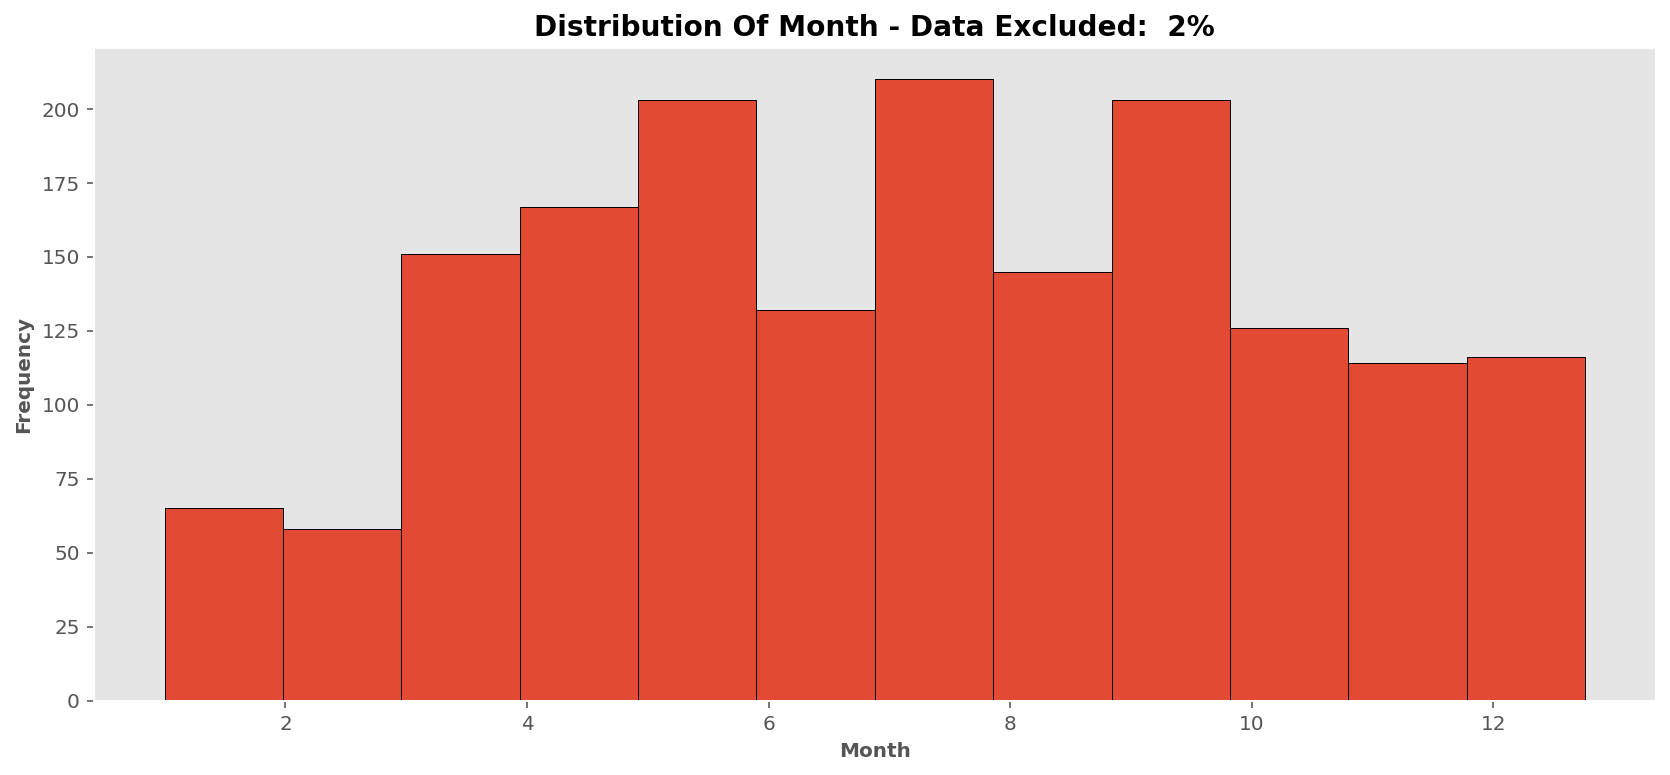

In [91]:
df.month = df.month.dropna()
myHistPlot(df, 'month', 0.98, limit=0.98)